In [1]:
import video_processing as vp
import librain as lb
import fnames
import numpy
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
from roipoly import RoiPoly 
import matplotlib.animation as Animation

import warnings
warnings.filterwarnings('ignore')

## Constants

In [2]:
HEIGHT = 256
WIDTH = 256
TRUE_FRAMERATE = 28.815
IMAGING_FRAMERATE = 1/(34704.0/1e6)

## File paths

In [3]:
path = "B:/Dual/" # location of "date" folders

direc = lb.Data(path)

date = "20190808"

experiment = "Experiment_1"

# help(direc.experiment)

EXP_2 = direc.experiment(date, exp_num=1)

# help(direc.file)

subset_behaviour_file = direc.file(
    exp_folder=EXP_2,
    fname="interpolated",
    subfolder="Behaviour",
)

# try: print(fnames.fnames.get("subset interpolated")) to see an example of a file that would correspond to
# fname="subset interpolated" in direc.file

l_mouse_processed_file = direc.file(
    exp_folder=EXP_2, fname="left green 0.01-12.0Hz", subfolder="Derivatives"
)

r_mouse_processed_file = direc.file(
    exp_folder=EXP_2, fname="right green 0.01-12.0Hz"
)

l_green_frame_file = direc.file(
    exp_folder=EXP_2, fname="left green"
)

r_green_frame_file = direc.file(
    exp_folder=EXP_2, fname="right green"
)

res = lb.Output(EXP_2) # root directory where processed files will be saved

# help(res.saveas)



In [4]:
print(l_mouse_processed_file)

B:\Dual\20190808\Experiment_1\Derivatives\LEFT_GREEN_processed_dff0_bandpass0.01-12.0Hz_MM004L-s_M002R-m_August-08_1101_experiment-1_DK.raw


In [5]:
l_green_frame = numpy.load(l_green_frame_file)
r_green_frame = numpy.load(r_green_frame_file)

## Load Calcium Imaging and Apply Gaussian Filter

In [6]:
l_mouse_frames = vp.extract_RAW_frames(
    l_mouse_processed_file,
    WIDTH,
    HEIGHT, 
    dtype='float32',
    num_channels=1
)
l_mouse_frames[numpy.where(l_mouse_frames == -numpy.inf)] = -1

r_mouse_frames = vp.extract_RAW_frames(
    r_mouse_processed_file,
    WIDTH,
    HEIGHT, 
    dtype='float32',
    num_channels=1
)
r_mouse_frames[numpy.where(r_mouse_frames == -numpy.inf)] = -1

In [7]:
SIGMA = 2
for i, (l_mouse_frame, r_mouse_frame) in enumerate(
    zip(l_mouse_frames, r_mouse_frames)
):
    l_mouse_frames[i] = gaussian_filter(l_mouse_frame, SIGMA)
    r_mouse_frames[i] = gaussian_filter(r_mouse_frame, SIGMA)

## Behaviour Video

In [8]:
behaviour_frames = vp.extract_RAW_frames(
    subset_behaviour_file,
    width=640,
    height=480, 
    dtype='uint8',
    num_channels=1
)

# Load Masks

In [22]:
l_mask_file = direc.file(
    exp_folder=EXP_2, 
    fname='LM mask'
)

r_mask_file = direc.file(
    exp_folder=EXP_2, 
    fname='RM mask'
)

l_mouse_mask = numpy.load(l_mask_file)
r_mouse_mask = numpy.load(r_mask_file)

## Mask Brains

([], <a list of 0 Text yticklabel objects>)

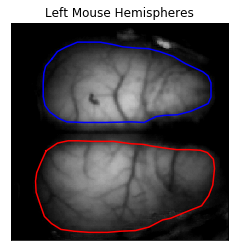

In [9]:
# Left mouse
plt.figure()

%matplotlib qt
plt.title('Left Mouse Left Hemisphere')
plt.imshow(l_green_frame, cmap='gray', vmin=0, vmax=150)
LM_left_hem = RoiPoly(color='b')
plt.title('Left Mouse Right Hemisphere')
plt.imshow(l_green_frame, cmap='gray', vmin=0, vmax=150)
LM_right_hem = RoiPoly(color='r')

%matplotlib inline
plt.title('Left Mouse Hemispheres')
plt.imshow(l_green_frame, cmap='gray', vmin=0, vmax=150)
LM_left_hem.display_roi()
LM_right_hem.display_roi()
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

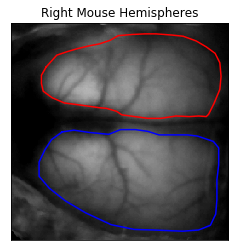

In [12]:
# Right mouse
plt.figure()

%matplotlib qt
plt.title('Right Mouse Left Hemisphere')
plt.imshow(r_green_frame, cmap='gray', vmin=0, vmax=150)
RM_left_hem = RoiPoly(color='b')
plt.title('Right Mouse Right Hemisphere')
plt.imshow(r_green_frame, cmap='gray', vmin=0, vmax=150)
RM_right_hem = RoiPoly(color='r')

%matplotlib inline
plt.title('Right Mouse Hemispheres')
plt.imshow(r_green_frame, cmap='gray', vmin=0, vmax=150)
RM_left_hem.display_roi()
RM_right_hem.display_roi()
plt.xticks([])
plt.yticks([])

## Plot the hemisphere masks

Text(0.5,1,'Right Mouse Mask')

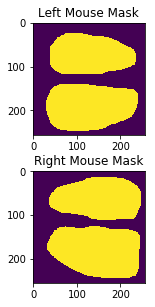

In [13]:
fig = plt.figure(figsize=(2,5))

ax = plt.subplot(2,1,1)
l_mouse_mask = numpy.logical_or(
    LM_left_hem.get_mask(l_mouse_frames[2000]),
    LM_right_hem.get_mask(l_mouse_frames[2000])
)    
ax.imshow(l_mouse_mask)
ax.set_title('Left Mouse Mask')

ax1 = plt.subplot(2,1,2)
r_mouse_mask = numpy.logical_or(
    RM_left_hem.get_mask(r_mouse_frames[2000]),
    RM_right_hem.get_mask(r_mouse_frames[2000])
)
ax1.imshow(r_mouse_mask)
ax1.set_title('Right Mouse Mask')

## Save the masks

In [35]:
l_mouse_mask_fname = res.saveas(
    f_out=l_mouse_mask,
    suffix="LM_mask",
    ftype="npy",
    save=True,
)

r_mouse_mask_fname = res.saveas(
    f_out=r_mouse_mask,
    suffix="RM_mask",
    ftype="npy",
    save=True,
)

Saved as LM_mask.npy
Saved as RM_mask.npy


## Select Behaviour ROI

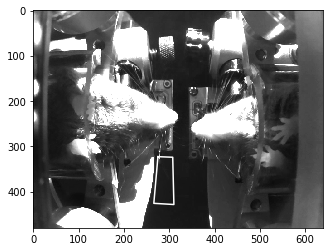

In [14]:
%matplotlib qt
plt.imshow(behaviour_frames[5000], cmap='gray', vmin=0, vmax=255)
grad_roi = RoiPoly(color='w')

%matplotlib inline
plt.imshow(behaviour_frames[5000], cmap='gray', vmin=0, vmax=255)
grad_roi.display_roi()

## Select the ROI to subtract from the behaviour ROI

IndexError: list index out of range

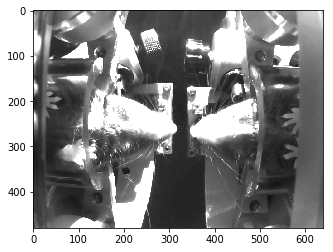

In [142]:
# %matplotlib qt
# plt.imshow(behaviour_frames[5000], cmap='gray', vmin=0, vmax=255)
# subtract_grad_roi = RoiPoly(color='w')

# %matplotlib inline
# plt.imshow(behaviour_frames[5000], cmap='gray', vmin=0, vmax=255)
# subtract_grad_roi.display_roi()

# Second ROI for mutual whisking

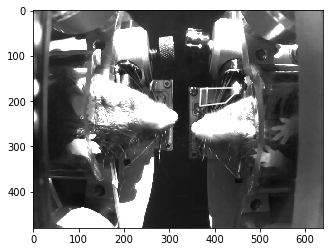

In [15]:
%matplotlib qt
plt.imshow(behaviour_frames[5000], cmap='gray', vmin=0, vmax=255)
grad_roi2 = RoiPoly(color='w')

%matplotlib inline
plt.imshow(behaviour_frames[5000], cmap='gray', vmin=0, vmax=255)
grad_roi2.display_roi()

## Plot the ROI gradient signal and threshold

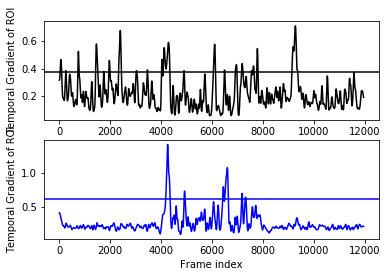

In [37]:
# grads = ['grad_roi']
grads = ['grad_roi', 'grad_roi2']
cols = ['k', 'b']

SIGMA=1.5
interaction_start = round(150*TRUE_FRAMERATE)
interaction_end = round(interaction_start + TRUE_FRAMERATE*120)

plt.figure()
for i in range(len(grads)):
    grad_mask = eval(grads[i]).get_mask(behaviour_frames[0])
    roi_gradient_signal = gaussian_filter(
        numpy.abs(
            numpy.gradient(
                numpy.mean(behaviour_frames[:, grad_mask], axis=1)
            )
        )
        ,20
    )
    signal_std = numpy.std(roi_gradient_signal[interaction_start:interaction_end])
    signal_mean = numpy.mean(roi_gradient_signal[interaction_start:interaction_end])
    threshold = signal_mean+SIGMA*signal_std
    
    plt.subplot(2, 1, i+1)
    plt.plot(roi_gradient_signal, color=cols[i]) #, label='Mean Temporal Gradient of ROI')
    plt.axhline(threshold, color=cols[i]) #, label='Threshold')
    plt.ylabel('Temporal Gradient of ROI')
    plt.xlabel('Frame index')
    
    if i==0:
        above_threshold = numpy.where(roi_gradient_signal[interaction_start:interaction_end] >= threshold)[0]
    elif i==1:
        above_threshold2 = numpy.where(roi_gradient_signal[interaction_start:interaction_end] >= threshold)[0]
        






[4322 4323 4324 4325 4326 4327 4328 4329 4330 4331 4332 4333 4334 4335
 4336 4337 4338 4339 4340 4341 4342 4343 4903 4904 4905 4906 4907 4908
 6497 6498 6499 7162 7163 7164 7165 7166 7167 7168 7169 7170 7171 7172
 7173 7174 7175 7176 7177 7178 7179 7180 7181 7182 7183 7184 7185 7186
 7187 7188 7189 7190 7191 7192 7193]


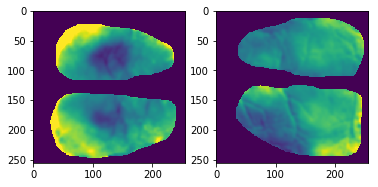

In [41]:
# # Find points of mutual whisking
# interaction_start = round(150*TRUE_FRAMERATE)
# interaction_end = round(interaction_start + TRUE_FRAMERATE*120)

mutual_whisking = numpy.intersect1d(above_threshold, above_threshold2)
# mutual_whisking = mutual_whisking[mutual_whisking >= interaction_start]
# mutual_whisking = mutual_whisking[mutual_whisking <= interaction_end]
print(interaction_start+mutual_whisking)

lmw = numpy.mean(l_mouse_frames[mutual_whisking+interaction_start, :, :], axis=0)
rmw = numpy.mean(r_mouse_frames[mutual_whisking+interaction_start, :, :], axis=0)

lmw[~l_mouse_mask] = -100
rmw[~r_mouse_mask] = -100

plt.figure()
plt.subplot(1,2,1)
plt.imshow(lmw, vmin = -0.05, vmax = 0.075)
plt.subplot(1,2,2)
plt.imshow(rmw, vmin = -0.05, vmax = 0.075)

## Identify the points where the signal is above and below the threshold

In [89]:
above_threshold = numpy.where(
    roi_gradient_signal >= threshold
)[0]
above_threshold = above_threshold[
    numpy.where(above_threshold > MIN_FRAME_THRESHOLD)
]


below_threshold = numpy.where(
    roi_gradient_signal < threshold
)[0]
below_threshold = below_threshold[
    numpy.where(below_threshold > MIN_FRAME_THRESHOLD)
]

## Get the means of the frames for these indices

In [90]:
l_gtm = numpy.mean(l_mouse_frames[above_threshold], axis=0)
r_gtm = numpy.mean(r_mouse_frames[above_threshold], axis=0)

NOT_l_gtm = numpy.mean(l_mouse_frames[below_threshold], axis=0)
NOT_r_gtm = numpy.mean(r_mouse_frames[below_threshold], axis=0)

#left_gtm = left_gtm-NOT_left_gtm
#right_gtm = right_gtm-NOT_right_gtm

# Mask out the remaining untouched values
l_gtm[~l_mouse_mask] = -100
r_gtm[~r_mouse_mask] = -100

## Plot this all up

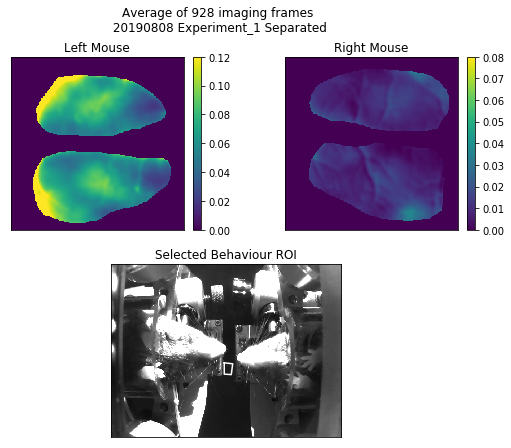

In [93]:
plt.figure(figsize=(9, 7))

plt.suptitle(
    "Average of {} imaging frames\n {}".format(
        str(numpy.shape(above_threshold)[0]), date+" "+experiment + " Separated"
    )
)
plt.subplot(221)
plt.title("Left Mouse")
plt.imshow(l_gtm, cmap='viridis', vmin=-0, vmax=0.12)
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.title("Right Mouse")
plt.imshow(r_gtm, cmap='viridis', vmin=-0, vmax=0.08)
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([])
plt.yticks([])

plt.subplot(212)
plt.title("Selected Behaviour ROI")
plt.imshow(behaviour_frames[5000], cmap='gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])
grad_roi.displayROI()

# whisker_map = res.saveas(
#     f_out=plt,
#     suffix="right_whisker_triggered_map_{}_frames".format(
#         numpy.shape(above_threshold)[0]
#     ),
#     ftype="png",
#     save=True,
#     fig=True,
# )

# Left and right GTM ROIs

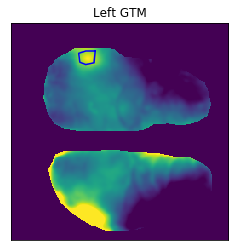

In [166]:
%matplotlib qt
plt.title('Left GTM')
plt.imshow(l_gtm, cmap='viridis', vmin=-0, vmax=0.05)
l_gtm_roi = RoiPoly(color='b')

%matplotlib inline
plt.title('Left GTM')
plt.imshow(l_gtm, cmap='viridis', vmin=-0, vmax=0.05)
plt.xticks([])
plt.yticks([])
l_gtm_roi.display_roi()

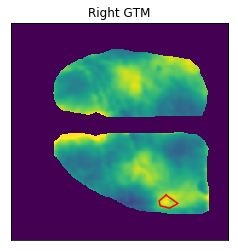

In [167]:
%matplotlib qt
plt.title('Right GTM')
plt.imshow(r_gtm, cmap='viridis', vmin=-0, vmax=0.05)
r_gtm_roi = RoiPoly(color='r')

%matplotlib inline
plt.title('Right GTM')
plt.imshow(r_gtm, cmap='viridis', vmin=-0, vmax=0.05)
plt.xticks([])
plt.yticks([])
r_gtm_roi.display_roi()

## Temporal mean of signal in ROI

In [168]:
l_calcium_signal = numpy.mean(
    l_mouse_frames[:, l_gtm_roi.get_mask(l_mouse_frames[0])], 
    axis=1
)
r_calcium_signal = numpy.mean(
    r_mouse_frames[:, r_gtm_roi.get_mask(r_mouse_frames[0])], 
    axis=1
)

exp_duration = l_calcium_signal.shape[0]/IMAGING_FRAMERATE
signal_x_axis = numpy.linspace(0, exp_duration, l_calcium_signal.shape[0])

## Plot Whisking triggered map

ValueError: x and y must have same first dimension, but have shapes (12018,) and (12017,)

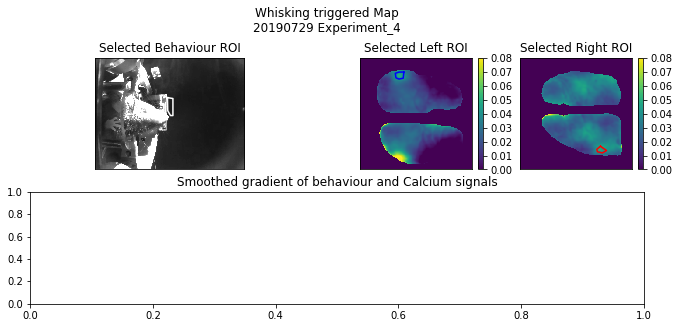

In [169]:
plt.figure(figsize=(11,7))
plt.suptitle("Whisking triggered Map\n"+date+" "+experiment)


plt.subplot(321)
plt.title("Selected Behaviour ROI")
plt.imshow(behaviour_frames[3217], cmap='gray', vmin=0.0, vmax=255)
plt.xticks([])
plt.yticks([])
grad_roi.display_roi()

plt.subplot(343)
plt.title("Selected Left ROI")
plt.imshow(l_gtm, vmin=0.0, vmax=0.08, cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([])
plt.yticks([])
l_gtm_roi.display_roi()

plt.subplot(344)
plt.title("Selected Right ROI")
plt.imshow(r_gtm, vmin=0.0, vmax=0.08, cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([])
plt.yticks([])
r_gtm_roi.display_roi()


plt.subplot(312)
plt.title("Smoothed gradient of behaviour and Calcium signals")
plt.plot(
    signal_x_axis, 
    roi_gradient_signal, 
    color='k', 
    linewidth=1, 
    label='Mean Temporal Gradient of ROI'
)
plt.xlim(signal_x_axis[0], signal_x_axis[-1])
plt.ylabel("Smoothed Gradient")
plt.axhline(SIGMA*signal_std, color='r', linewidth=1, label='Threshold')
plt.legend()

plt.subplot(313)
plt.plot(
    signal_x_axis, 
    l_calcium_signal, 
    linewidth=1, 
    color='b', 
    label='Left Mouse'
)
plt.plot(
    signal_x_axis, 
    r_calcium_signal, 
    linewidth=1, 
    color='r', 
    label='Right Mouse'
)
plt.xlim(signal_x_axis[0], signal_x_axis[-1])
plt.ylabel(r"$\frac{\Delta F}{F _{0}}$", rotation=0, size=20)
plt.xlabel("Time(s)")

plt.legend()

whisker_map_signals = res.saveas(
    f_out=plt,
    suffix="whisker_triggered_map_with_signals",
    ftype="svg",
    save=True,
    fig=True,
)

## Make video from selected behaviour frames

Writing frames...
Done!


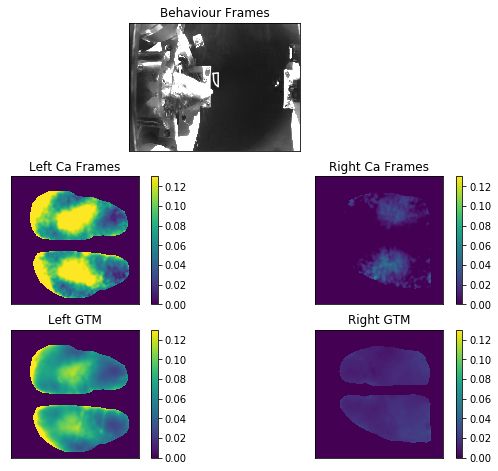

In [179]:
im_frame = numpy.zeros((256, 256))
beh_frame = numpy.zeros((180, 320))

# Generate file name for video
behaviour_fname = res.saveas(
    f_out=numpy.array(["placeholder"]),
    suffix="behaviour_frames_GTM_LM_body",
    ftype="mp4",
    f_in=l_mouse_processed_file,
)

FFMpegWriter = Animation.writers["ffmpeg"]
metadata = dict(
    title=EXP_2, artist="Fed", comment="10Hz_playback"
)
writer = FFMpegWriter(fps=10, metadata=metadata)
fig = plt.figure(figsize=(10, 8))


ax3 = fig.add_subplot(3, 1, 1)
ax3.set_title("Behaviour Frames")
ax3.get_yaxis().set_visible(False)
ax3.get_xaxis().set_visible(False)
beh_frame = behaviour_frames[above_threshold[0]]
beh_image = ax3.imshow(
    beh_frame, cmap="gray", vmin=0, vmax=255
)
grad_roi.displayROI()


ax1 = fig.add_subplot(3, 2, 3)
ax1.set_title("Left Ca Frames")
ax1.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
im_frame = l_gtm
im_LM_ca = ax1.imshow(
    im_frame, cmap="viridis", vmin=0, vmax=0.13
)
cbar = fig.colorbar(im_LM_ca)

ax2 = fig.add_subplot(3, 2, 4)
ax2.set_title("Right Ca Frames")
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
im_frame = r_gtm
im_RM_ca = ax2.imshow(
    im_frame, cmap="viridis", vmin=0, vmax=0.13
)
cbar = fig.colorbar(im_RM_ca)


ax4 = fig.add_subplot(3, 2, 5)
ax4.set_title("Left GTM")
ax4.get_yaxis().set_visible(False)
ax4.get_xaxis().set_visible(False)
im_frame = l_gtm
im_left_gtm = ax4.imshow(
    im_frame, cmap="viridis", vmin=0, vmax=0.13
)
cbar = fig.colorbar(im_left_gtm)

ax5 = fig.add_subplot(3, 2, 6)
ax5.set_title("Right GTM")
ax5.get_yaxis().set_visible(False)
ax5.get_xaxis().set_visible(False)
im_frame = r_gtm
im_right_gtm = ax5.imshow(
    im_frame, cmap="viridis", vmin=0, vmax=0.13
)
cbar = fig.colorbar(im_right_gtm)


print("Writing frames...")
with writer.saving(
    fig, outfile=EXP_2 + "\\" + behaviour_fname, dpi=100
):
    for i in above_threshold:
        beh_frame = behaviour_frames[i]
        beh_image.set_data(beh_frame)
        im_frame = l_mouse_frames[i]
        im_frame[~l_mouse_mask] = -100
        im_LM_ca.set_data(im_frame)
        im_frame = r_mouse_frames[i]
        im_frame[~r_mouse_mask] = -100
        im_RM_ca.set_data(im_frame)
        writer.grab_frame()
print("Done!")

## Extracting 75 percentile frames above threshold

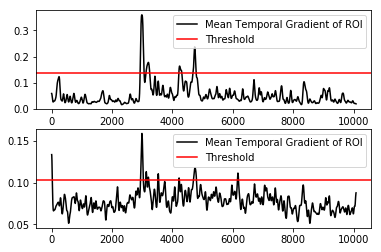

In [43]:
SIGMA = 2
grad_mask = grad_roi.getMask(behaviour_frames[0])
roi_gradient_signal = gaussian_filter(
    numpy.abs(
        numpy.gradient(
            numpy.mean(
                behaviour_frames[:, grad_mask], axis=1
            )
        )
    ),
    20,  # sigma
)
signal_std = numpy.std(roi_gradient_signal)
signal_mean = numpy.mean(roi_gradient_signal)
signal_threshold = signal_mean + SIGMA * signal_std

subtract_grad_mask = subtract_grad_roi.getMask(
    behaviour_frames[0]
)
subtract_roi_gradient_signal = gaussian_filter(
    numpy.abs(
        numpy.gradient(
            numpy.mean(
                behaviour_frames[:, subtract_grad_mask],
                axis=1,
            )
        )
    ),
    20,  # sigma
)

subtract_signal_std = numpy.std(
    subtract_roi_gradient_signal
)
subtract_signal_mean = numpy.mean(
    subtract_roi_gradient_signal
)
subtract_threshold = (
    subtract_signal_mean + SIGMA * subtract_signal_std
)


plt.figure()
plt.subplot(211)
plt.plot(
    roi_gradient_signal,
    color="k",
    label="Mean Temporal Gradient of ROI",
)
plt.axhline(signal_threshold, color="r", label="Threshold")
plt.legend()
plt.subplot(212)
plt.plot(
    subtract_roi_gradient_signal,
    color="k",
    label="Mean Temporal Gradient of ROI",
)
plt.axhline(subract_threshold, color="r", label="Threshold")
plt.legend()

indeces = numpy.where(
    roi_gradient_signal[100:] >= signal_threshold
)
indeces = numpy.asarray(indeces)
indeces += 100

subtract_indeces = numpy.where(
    subtract_roi_gradient_signal[100:] >= subtract_threshold
)
subtract_indeces = numpy.asarray(subtract_indeces)
subtract_indeces += 100

In [ ]:
percentile_75 = numpy.array(
    [
        numpy.percentile(l_calcium_signal[indeces], 75),
        numpy.percentile(r_calcium_signal[indeces], 75),
    ]
)

# Fed was saving this for some reason; see cell below for the content of the file
"""
if "12mm" in l_green_frame_file:
    numpy.save(
        directory
        + experiment
        + "75th_percentile_calcium_together.npy",
        percentile_75,
    )
    print("Saved 12mm file")
"""

In [45]:
numpy.load("C:/Users/User/Documents/FEDCODE - Nick/20180312/Experiment_2/75th_percentile_calcium_together.npy")

array([0.08204699, 0.10476258])

In [47]:
pruned_indeces = [[]]
for index in indeces[0]:
    add = True
    for subtract_index in subtract_indeces[0]:
        if index == subtract_index:
            add = False
    if add:
        pruned_indeces[0].append(index)

In [51]:
left_gtm = numpy.mean(l_mouse_frames[pruned_indeces], axis=0)
right_gtm = numpy.mean(r_mouse_frames[pruned_indeces], axis=0)


left_gtm[~l_mouse_mask] = -100
right_gtm[~r_mouse_mask] = -100

Saved as whisker_triggered_map_201_frames.svg


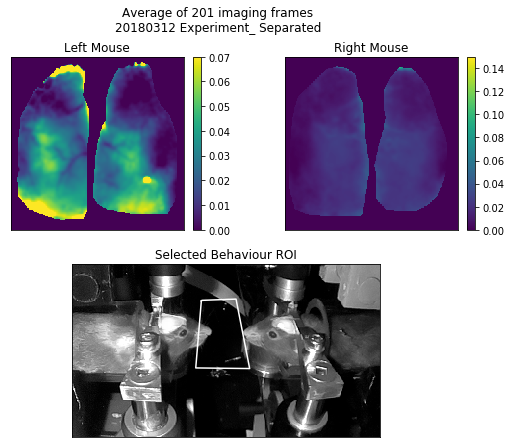

In [58]:
plt.figure(figsize=(9, 7))
# plt.figure(figsize=(8, 4))
plt.suptitle(
    "Average of %s imaging frames\n"
    % str(numpy.shape(pruned_indeces)[1])
    + date
    + " "
    + experiment[:-1]
    + " Separated"
)
plt.subplot(221)
plt.title("Left Mouse")
plt.imshow(left_gtm, cmap="viridis", vmin=0.00, vmax=0.07)
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.title("Right Mouse")
plt.imshow(right_gtm, cmap="viridis", vmin=0.00, vmax=0.15)
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([])
plt.yticks([])

plt.subplot(212)
plt.title("Selected Behaviour ROI")
plt.imshow(
    behaviour_frames[3217], cmap="gray", vmin=0, vmax=255
)
plt.xticks([])
plt.yticks([])
grad_roi.displayROI()

whisker_map_1 = res.saveas(
    f_out=plt,
    suffix="whisker_triggered_map_{}_frames".format(
        numpy.shape(pruned_indeces)[1]
    ),
    ftype="svg",
    save=True,
    fig=True,
)